In [1]:
# Import packages
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm

In [3]:
# Import CAPE
cape_jan1990_path = '/Users/JFNeedham/Desktop/CAPE_downloads/data_downloads/1990_01.nc'
cape_jan1990 = xr.open_dataset(cape_jan1990_path,  decode_times=False)


In [4]:
print(cape_jan1990.dims)

Frozen({'time': 31, 'lat': 241, 'lon': 1440})


In [11]:
print(cape_jan1990.var)

<bound method DatasetAggregations.var of <xarray.Dataset>
Dimensions:      (time: 31, lat: 241, lon: 1440)
Coordinates:
  * time         (time) int64 0 1 2 3 4 5 6 7 8 9 ... 22 23 24 25 26 27 28 29 30
    realization  int64 ...
  * lat          (lat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * lon          (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
Data variables:
    cape         (time, lat, lon) float32 28.5 26.38 29.25 ... 17.0 18.12 18.38
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2024-02-16T19:40 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF>


In [12]:
cape_timemean = cape_jan1990.cape.mean(dim='time')
print(cape_timemean.coords)

Coordinates:
    realization  int64 ...
  * lat          (lat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.5 29.75 30.0
  * lon          (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8


''

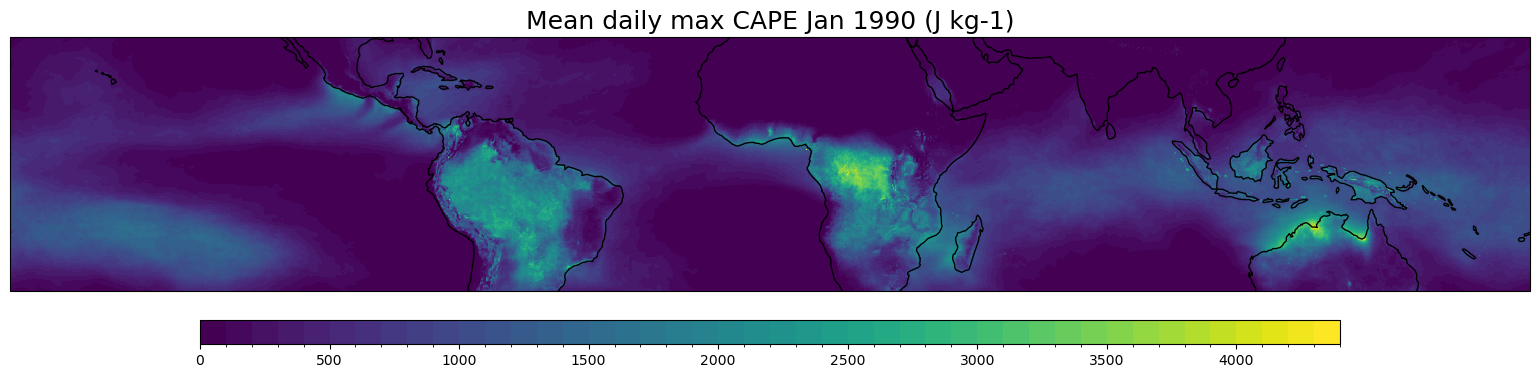

In [18]:
clevs=np.arange(0,4500,100)

fig, axs = plt.subplots(nrows=1,ncols=1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(19,4))

cs= cape_timemean.plot(levels=clevs,cmap='viridis', add_colorbar=False)
axs.coastlines()
axs.set_title('Mean daily max CAPE Jan 1990 (J kg-1)', fontsize=18)
            
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9,
                    wspace=0.02, hspace=0.02)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.06])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')


;